In [1]:
import sys
from itertools import count
from torch import autograd
from torch_geometric.utils import dense_to_sparse
import copy
from collections import defaultdict

sys.path.append('../../')

from src.models.gcn import *
from src.utils.datasets import *
from src.models.trainable import *
from src.attacks.greedy_gd import *

print(sys.executable)

/home/wcorcoran/anaconda3/envs/mesp/bin/python


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [5]:
model.reset_parameters()
train = Trainable(model)
train.fit(data, 200)

Epoch 0, Train Loss - 6.834479331970215, Val Loss - 4.258690357208252, Val Accuracy - 0.253
Epoch 20, Train Loss - 0.5043007135391235, Val Loss - 1.270857572555542, Val Accuracy - 0.731
Epoch 40, Train Loss - 0.20555242896080017, Val Loss - 1.4677469730377197, Val Accuracy - 0.742
Epoch 60, Train Loss - 0.13937246799468994, Val Loss - 1.624828815460205, Val Accuracy - 0.741
Epoch 80, Train Loss - 0.09454311430454254, Val Loss - 1.635231375694275, Val Accuracy - 0.753
Epoch 100, Train Loss - 0.08141008019447327, Val Loss - 1.7305960655212402, Val Accuracy - 0.75
Epoch 120, Train Loss - 0.1354520469903946, Val Loss - 1.7933837175369263, Val Accuracy - 0.738
Epoch 140, Train Loss - 0.0952175185084343, Val Loss - 1.8885849714279175, Val Accuracy - 0.722
Epoch 160, Train Loss - 0.09349260479211807, Val Loss - 1.939565658569336, Val Accuracy - 0.718
Epoch 180, Train Loss - 0.03154808282852173, Val Loss - 1.9685214757919312, Val Accuracy - 0.718
Epoch 200, Train Loss - 0.04537535086274147, Va

In [6]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.736
Initial Loss: 1.8863134384155273


In [7]:
# run 5 metattacks w/ ptb of 1
amts = defaultdict(int)

for _ in range(10):
    attacker = Metattack(data, device=device)
    attacker.setup_surrogate(model,
                         labeled_nodes=data.train_mask,
                         unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(0.1)

    for edge in attacker._added_edges.keys():
        amts[edge] += 1

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/527 [00:00<?, ?it/s]

In [8]:
amts

defaultdict(int,
            {(57, 2410): 9,
             (49, 2432): 8,
             (21, 2411): 2,
             (4, 1591): 6,
             (7, 959): 2,
             (115, 2513): 4,
             (23, 1310): 2,
             (13, 500): 2,
             (79, 2571): 5,
             (66, 2417): 6,
             (76, 225): 2,
             (50, 2258): 2,
             (79, 1938): 2,
             (86, 2527): 3,
             (115, 1024): 7,
             (115, 986): 1,
             (29, 1793): 2,
             (19, 2593): 4,
             (38, 1648): 1,
             (82, 2299): 1,
             (37, 2255): 1,
             (115, 2551): 5,
             (86, 96): 1,
             (54, 1084): 2,
             (131, 2098): 2,
             (120, 462): 3,
             (58, 832): 3,
             (63, 2297): 5,
             (4, 2605): 3,
             (11, 2341): 1,
             (115, 545): 5,
             (130, 1048): 1,
             (60, 2533): 1,
             (32, 2396): 7,
             (54, 2699): 2,
       

In [9]:
sorted_list = sorted(amts.items(), key=lambda item: item[1], reverse=True)
sorted_keys = [key for key, value in sorted_list]

In [10]:
sorted_list

[((32, 1372), 10),
 ((32, 491), 10),
 ((57, 2410), 9),
 ((32, 2608), 9),
 ((32, 2164), 9),
 ((49, 2432), 8),
 ((32, 499), 8),
 ((32, 2604), 8),
 ((32, 2158), 8),
 ((54, 2588), 8),
 ((23, 2255), 8),
 ((115, 1024), 7),
 ((32, 2396), 7),
 ((57, 2104), 7),
 ((58, 1643), 7),
 ((58, 1418), 7),
 ((58, 198), 7),
 ((23, 625), 7),
 ((58, 2549), 7),
 ((58, 1422), 7),
 ((32, 2316), 7),
 ((32, 2649), 7),
 ((32, 2454), 7),
 ((32, 1236), 7),
 ((23, 2612), 7),
 ((23, 2142), 7),
 ((58, 2505), 7),
 ((23, 2697), 7),
 ((4, 1591), 6),
 ((66, 2417), 6),
 ((4, 313), 6),
 ((58, 1454), 6),
 ((58, 956), 6),
 ((54, 1223), 6),
 ((54, 1686), 6),
 ((61, 295), 6),
 ((23, 322), 6),
 ((58, 2672), 6),
 ((60, 890), 6),
 ((23, 2429), 6),
 ((23, 2477), 6),
 ((23, 2559), 6),
 ((116, 2692), 6),
 ((79, 2571), 5),
 ((115, 2551), 5),
 ((63, 2297), 5),
 ((115, 545), 5),
 ((27, 2541), 5),
 ((32, 106), 5),
 ((31, 32), 5),
 ((23, 1132), 5),
 ((62, 988), 5),
 ((60, 630), 5),
 ((136, 2635), 5),
 ((54, 2624), 5),
 ((54, 1364), 5),
 (

In [11]:
edges_to_add = sorted_keys

In [12]:
edges_to_add

[(32, 1372),
 (32, 491),
 (57, 2410),
 (32, 2608),
 (32, 2164),
 (49, 2432),
 (32, 499),
 (32, 2604),
 (32, 2158),
 (54, 2588),
 (23, 2255),
 (115, 1024),
 (32, 2396),
 (57, 2104),
 (58, 1643),
 (58, 1418),
 (58, 198),
 (23, 625),
 (58, 2549),
 (58, 1422),
 (32, 2316),
 (32, 2649),
 (32, 2454),
 (32, 1236),
 (23, 2612),
 (23, 2142),
 (58, 2505),
 (23, 2697),
 (4, 1591),
 (66, 2417),
 (4, 313),
 (58, 1454),
 (58, 956),
 (54, 1223),
 (54, 1686),
 (61, 295),
 (23, 322),
 (58, 2672),
 (60, 890),
 (23, 2429),
 (23, 2477),
 (23, 2559),
 (116, 2692),
 (79, 2571),
 (115, 2551),
 (63, 2297),
 (115, 545),
 (27, 2541),
 (32, 106),
 (31, 32),
 (23, 1132),
 (62, 988),
 (60, 630),
 (136, 2635),
 (54, 2624),
 (54, 1364),
 (54, 804),
 (54, 1019),
 (58, 1559),
 (58, 585),
 (358, 2618),
 (54, 926),
 (54, 2032),
 (14, 601),
 (54, 293),
 (58, 2578),
 (60, 1982),
 (29, 1387),
 (86, 1084),
 (54, 1860),
 (32, 1836),
 (32, 1501),
 (54, 697),
 (94, 508),
 (7, 2411),
 (21, 2593),
 (29, 2374),
 (10, 2193),
 (32,

In [13]:
# save model
model_save_path = "multi_metattack_gcn_model.pth"
torch.save(model.state_dict(), model_save_path)

# save edges
list_save_path = "multi_metattack_edges_list.pth"
torch.save(edges_to_add, list_save_path)

In [28]:
loaded_model_state_dict = torch.load(model_save_path)

model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)
model.load_state_dict(loaded_model_state_dict)

# Load the saved list
edges_to_add = torch.load(list_save_path)

In [29]:
from torch_geometric.utils import dense_to_sparse, to_networkx, from_networkx
import networkx as nx

In [30]:
G = to_networkx(data, to_undirected=True)
initial_edge_count = G.number_of_edges() // 2
ptb_rate = 0.15
budget = int(ptb_rate * initial_edge_count)

In [17]:
# import sys
# import torch
# from itertools import count
# from torch_geometric.utils import dense_to_sparse, to_networkx, from_networkx
# import random
# import numpy as np
# import networkx as nx

# # Convert the graph to NetworkX for manipulation
# G = to_networkx(data, to_undirected=True)

# # Store initial edge count
# initial_edge_count = G.number_of_edges() // 2
# print('num edges: ', initial_edge_count)

# ptb_rate = 0.3

# # Degree-based Edge Addition
# budget = int(ptb_rate * initial_edge_count)  # Define the number of edges to add

# # Calculate the degree of each node
# degrees = dict(G.degree())

# def sum_degs(edge):
#     return degrees[edge[0]]+ degrees[edge[1]]

# # Group nodes by degree range (e.g., group nodes with degrees within ±1)
# degree_bins = {}
# for node, degree in degrees.items():
#     bin_key = degree // 2  # Bin nodes by ranges of 2
#     if bin_key not in degree_bins:
#         degree_bins[bin_key] = []
#     degree_bins[bin_key].append(node)

# # Generate potential edges between nodes in the same degree bin
# edges_to_add = []
# for bin_nodes in degree_bins.values():
#     if len(bin_nodes) > 1:
#         # Randomly pair nodes within the same bin
#         random.shuffle(bin_nodes)
#         for i in range(len(bin_nodes)):
#             for j in range(i + 1, len(bin_nodes)):
#                 if not G.has_edge(bin_nodes[i], bin_nodes[j]) and i != j:
#                     edges_to_add.append(((bin_nodes[i], bin_nodes[j]), sum_degs((bin_nodes[i], bin_nodes[j]))))
                    
# edges_to_add.sort(key=lambda x:-x[1])

In [31]:
print(len(edges_to_add))
print(budget)

3633
395


In [32]:
print(edges_to_add)

[(32, 1372), (32, 491), (57, 2410), (32, 2608), (32, 2164), (49, 2432), (32, 499), (32, 2604), (32, 2158), (54, 2588), (23, 2255), (115, 1024), (32, 2396), (57, 2104), (58, 1643), (58, 1418), (58, 198), (23, 625), (58, 2549), (58, 1422), (32, 2316), (32, 2649), (32, 2454), (32, 1236), (23, 2612), (23, 2142), (58, 2505), (23, 2697), (4, 1591), (66, 2417), (4, 313), (58, 1454), (58, 956), (54, 1223), (54, 1686), (61, 295), (23, 322), (58, 2672), (60, 890), (23, 2429), (23, 2477), (23, 2559), (116, 2692), (79, 2571), (115, 2551), (63, 2297), (115, 545), (27, 2541), (32, 106), (31, 32), (23, 1132), (62, 988), (60, 630), (136, 2635), (54, 2624), (54, 1364), (54, 804), (54, 1019), (58, 1559), (58, 585), (358, 2618), (54, 926), (54, 2032), (14, 601), (54, 293), (58, 2578), (60, 1982), (29, 1387), (86, 1084), (54, 1860), (32, 1836), (32, 1501), (54, 697), (94, 508), (7, 2411), (21, 2593), (29, 2374), (10, 2193), (32, 2461), (60, 587), (29, 925), (29, 451), (29, 2628), (7, 1541), (11, 135), (9,

In [39]:
def two_phase_attack(split):
    diff_threshold = abs(initial_loss/200)
    first_phase_edges = int(budget * split)
    second_phase_percent = ptb_rate * (1 - split) * 1/2
    print(second_phase_percent)
    accuracies = []
    G = to_networkx(data, to_undirected=True)
    
    data_copy = copy.copy(data)
    i, j = 0, 0 # i - number added, j - spot in list
    while i < first_phase_edges:
        u, v = edges_to_add[j]
    
        G.add_edge(u, v)
    
        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
        # print(modified_loss)
    
        if (abs(modified_loss - initial_loss) / max(modified_loss, initial_loss)) <= diff_threshold:
        # if modified_accuracy == initial_accuracy:
            # print(modified_accuracy, i)
            i += 1
            # accuracies.append(modified_accuracy)
            accuracies.append(modified_loss)
        else:
            # print(i, 'miss!')
            G.remove_edge(u, v)
            
        j += 1
    
    modified_data = from_networkx(G).to(device)
    modified_data.x = data.x 
    modified_data.y = data.y 
    modified_data.train_mask = data.train_mask
    modified_data.test_mask = data.test_mask
    
    attacker = Metattack(modified_data, device=device)
    attacker.setup_surrogate(model,
                             labeled_nodes=data.train_mask,
                             unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(second_phase_percent)

    degs = defaultdict(tuple)
    
    for k, v in attacker._added_edges.items():
        degs[v] = (k, True)
        
    for k, v in attacker._removed_edges.items():
        degs[v] = (k, False)
    
    for _, second in degs.items():
        u, v = second[0]
        if second[1]:
            G.add_edge(u, v)
        else:
            G.remove_edge(u, v)
    
        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
    
        # accuracies.append(modified_accuracy)
        accuracies.append(modified_loss)

    print(accuracies)
    return accuracies

In [40]:
splits = [0, 0.5, 0.7, 0.9]
split_dic = defaultdict(list)

In [41]:
for s in splits:
    print(s)
    split_dic[s] = two_phase_attack(s)

0
0.075


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.882865309715271, 1.8777198791503906, 1.8789317607879639, 1.8782724142074585, 1.874988317489624, 1.8787362575531006, 1.8783586025238037, 1.8734673261642456, 1.8756153583526611, 1.8781894445419312, 1.8777811527252197, 1.8780419826507568, 1.8760112524032593, 1.8774861097335815, 1.8798085451126099, 1.8784762620925903, 1.8797155618667603, 1.8877472877502441, 1.8877472877502441, 1.892079472541809, 1.8881590366363525, 1.8882278203964233, 1.893772006034851, 1.8885498046875, 1.888479471206665, 1.8884814977645874, 1.8884814977645874, 1.8880488872528076, 1.886745810508728, 1.8898241519927979, 1.8893308639526367, 1.8893308639526367, 1.8893307447433472, 1.8890786170959473, 1.8929939270019531, 1.8928377628326416, 1.8950738906860352, 1.9048265218734741, 1.9047495126724243, 1.90485680103302, 1.904304027557373, 1.9052351713180542, 1.905236840248108, 1.9052369594573975, 1.90439772605896, 1.904710292816162, 1.9063719511032104, 1.9065817594528198, 1.9065598249435425, 1.903357982635498, 1.90259861946105

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.8863110542297363, 1.8863129615783691, 1.8811676502227783, 1.8811681270599365, 1.8821810483932495, 1.8787329196929932, 1.878769874572754, 1.8790998458862305, 1.8798917531967163, 1.8799034357070923, 1.8830727338790894, 1.8830727338790894, 1.8825931549072266, 1.8807957172393799, 1.8807957172393799, 1.8807957172393799, 1.8807957172393799, 1.8798415660858154, 1.8797450065612793, 1.8797297477722168, 1.8889449834823608, 1.8879488706588745, 1.8901394605636597, 1.8936243057250977, 1.8918886184692383, 1.8916471004486084, 1.8916712999343872, 1.8907538652420044, 1.8919658660888672, 1.8898422718048096, 1.8894339799880981, 1.8894070386886597, 1.8894009590148926, 1.8893494606018066, 1.889399766921997, 1.889399766921997, 1.888948917388916, 1.8888548612594604, 1.888854742050171, 1.8880079984664917, 1.887449860572815, 1.8872296810150146, 1.889859676361084, 1.8904364109039307, 1.890373706817627, 1.8812047243118286, 1.8812025785446167, 1.8821337223052979, 1.887230396270752, 1.8885747194290161, 1.888814

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8863110542297363, 1.8863129615783691, 1.8811676502227783, 1.8811681270599365, 1.8821810483932495, 1.8787329196929932, 1.878769874572754, 1.87909996509552, 1.8798917531967163, 1.8799034357070923, 1.8830727338790894, 1.8830727338790894, 1.8825931549072266, 1.8807957172393799, 1.8807955980300903, 1.8807957172393799, 1.8807957172393799, 1.8798415660858154, 1.8797450065612793, 1.8797298669815063, 1.8889449834823608, 1.8879488706588745, 1.8901394605636597, 1.8936243057250977, 1.8918886184692383, 1.8916471004486084, 1.8916712999343872, 1.8907538652420044, 1.8919658660888672, 1.8898422718048096, 1.8894339799880981, 1.8894071578979492, 1.8894009590148926, 1.8893494606018066, 1.889399766921997, 1.889399766921997, 1.8889487981796265, 1.8888548612594604, 1.888854742050171, 1.8880078792572021, 1.887449860572815, 1.8872298002243042, 1.889859676361084, 1.8904364109039307, 1.8903735876083374, 1.8812048435211182, 1.8812025785446167, 1.8821337223052979, 1.887230396270752, 1.8885747194290161, 1.888814

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8863110542297363, 1.8863129615783691, 1.8811676502227783, 1.8811681270599365, 1.8821810483932495, 1.8787329196929932, 1.878769874572754, 1.8790998458862305, 1.8798917531967163, 1.8799034357070923, 1.8830727338790894, 1.8830727338790894, 1.8825931549072266, 1.8807957172393799, 1.8807957172393799, 1.8807957172393799, 1.8807957172393799, 1.8798415660858154, 1.8797450065612793, 1.8797298669815063, 1.8889449834823608, 1.8879488706588745, 1.8901394605636597, 1.8936243057250977, 1.8918886184692383, 1.8916471004486084, 1.8916712999343872, 1.8907538652420044, 1.8919658660888672, 1.8898422718048096, 1.8894339799880981, 1.8894070386886597, 1.8894009590148926, 1.8893496990203857, 1.889399766921997, 1.889399766921997, 1.8889487981796265, 1.8888548612594604, 1.888854742050171, 1.8880079984664917, 1.887449860572815, 1.8872296810150146, 1.8898597955703735, 1.8904364109039307, 1.890373706817627, 1.8812048435211182, 1.8812024593353271, 1.8821337223052979, 1.887230396270752, 1.8885747194290161, 1.8888

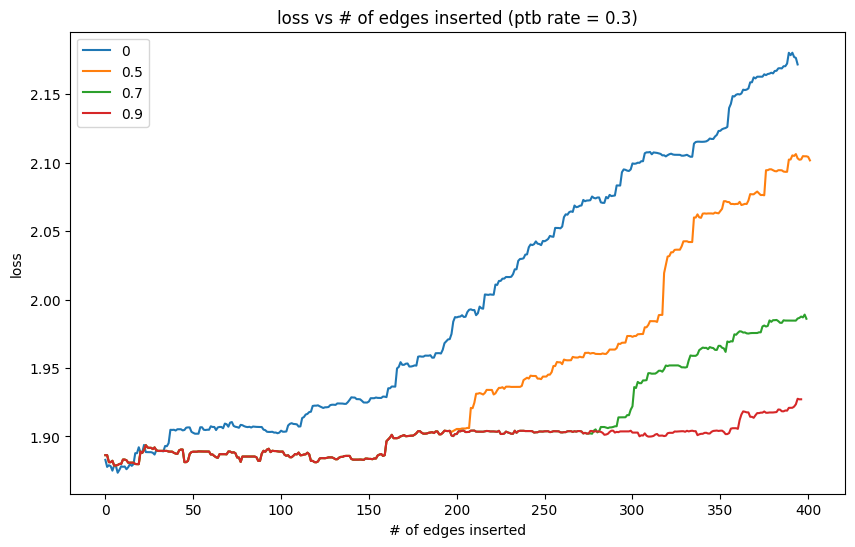

In [42]:
import matplotlib.pyplot as plt

# split_dic2 = copy.copy(split_dic)

# for label, values in split_dic2.items():
#     for i in range(len(values)):
#         split_dic2[label][i] = - abs(values[i] - initial_loss)

plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15)')
plt.legend()

plt.show()